# Customer Segmentation
---

By Arup Jana(04/05/2024)


**Steps:**
1. <u>Loading E-Commerce dataset</u> - Using library to load the whole dataset with Pandas with the right encoding format.
2. <u>Understanding dataset</u>: I begin by understanding the structure and content of this dataset. This involves examining the columns, data types, and any missing values.
3. <u>Data Cleaning</u>: Clean the dataset by handling missing values, outliers, and any inconsistencies in the data. Ensure data types are appropriate for analysis.
3. <u>Data Exploration</u>: 
    - Perform exploratory data analysis to gain insights into the dataset. This involves summary statistics, data visualization, and understanding the distribution of key variables such as sales, quantity sold, customer demographics, etc.
    - Explore trends and patterns in customer behavior, such as purchase frequency, average order value, popular products, and seasonal variations.
4. <u>Feature Engineering</u>: 
    - Create new features that could be insightful for segmentation. Deriving features from product descriptions, other features such as total purchase amount, recency of last purchase, frequency of purchases, etc.
    - Using techniques like RFM (Recency, Frequency, Monetary) analysis, which is commonly used in customer segmentation.
5. <u>Customer Segmentation</u>:
    -  Group customers based on similarity in purchasing behavior.
    - Evaluate the segmentation results using metrics such as silhouette score, within-cluster sum of squares, or domain-specific metrics.
6. <u>Interpretation and Profiling</u>:
    - Interpret the segments obtained from the clustering analysis. Understand the characteristics of each segment in terms of their purchasing behavior, preferences, and demographics.
    - Profile each segment by summarizing their key attributes and behaviors. This could involve creating personas or customer profiles for each segment.
    
    
---
**Acknowledgement:** Most of the analysis and code has been taken from the <a href="https://www.kaggle.com/code/fabiendaniel/customer-segmentation"><u>customer segmentation notebook</u></a> build by <a href="https://www.kaggle.com/fabiendaniel">F. Daniel</a>.

---
I am working on this project by taking helps and found the above notebook very helpful. This notebook focuses on making the codes better and effecient and also easy to read and understand. Along with that, I am rearranging the stuffs according to a normal data analysis project structure so that people who look at this notebook don't get lost with what is what.

Finally, if you like this notebook, don't forget to visit F. Daniel's notebook and give a upvote.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

---
## Data Loading
Load the e-commerce dataser with the correct encoding and converting the columns to their right types.

In [2]:
ecom_data = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')

Make a copy so we do not make any wrong modifications on original dataset and can always refer back to this cell to get the original data back.

In [3]:
df = ecom_data.copy(deep=True)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


---
## Data Understanding

**Dataset Description:** This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**More detail of the dataset:** By looking at few entries in the dataset, each transaction has some generated invoice no along with the product details like the stock code, description of the product, no of products purchased, date on which it was purchased, per unit what is the price, who bought the product and finally from which country's store it was purchased.

**Details of the columns:** 

This dataset contains 8 variables that correspond to: 

- *InvoiceNo*: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  <br>
- *StockCode*: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
- *Description*: Product (item) name. Nominal. <br>
- *Quantity*: The quantities of each product (item) per transaction. Numeric.	<br>
- *InvoiceDate*: Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
- *UnitPrice*: Unit price. Numeric, Product price per unit in sterling. <br>
- *CustomerID*: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
- *Country*: Country name. Nominal, the name of the country where each customer resides.<br>

---
## Data Cleaning

Here, I will perform the following operations to clean the dataset-
- Remove the null values from columns that contain empty cells.
- Remove duplicates from the dataset.
- Changing the `InvoiceDate` column type to datetime type.
- Taking care cancelled orders in the dataset and removing them without losing information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are some missing values in some of the columns in the dataset. Let's look at the null values and take care of them.

In [6]:
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info= pd.concat([tab_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])
tab_info=pd.concat([tab_info, pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'})])
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Drop the null rows present in the `CustomerID` column using dropna method.

In [7]:
df.dropna(axis=0, subset=['CustomerID'], inplace=True)

# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info= pd.concat([tab_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])
tab_info=pd.concat([tab_info, pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'})])
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Delete the duplicate rows from the dataset.

In [8]:
print(f"Duplicate entries in the dataset: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print(f"Duplicate entries after the deletion operation in the dataset: {df.duplicated().sum()}")

Duplicate entries in the dataset: 5225
Duplicate entries after the deletion operation in the dataset: 0


Convert the data type of `InvoiceDate` to datetime in pandas.

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


To find the number of products purchased in every transaction, first I need to group the data based on unique transactions and count the no of InvoiceDate.

In [11]:
temp = df.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
temp['Order Cancelled'] = temp['InvoiceNo'].apply(lambda x: int('C' in x))
total_cancelled_orders = temp['Order Cancelled'].sum()
print(f"Percentage of cancelled orders over total orders: {total_cancelled_orders / temp.shape[0]: .2f}")

Percentage of cancelled orders over total orders:  0.16


16% of the transactions were cancelled. So, obviously it is a big amount from the dataset. I will try to find out whether I can do something with this cancelled data instead of just removing them.

In [12]:
display(df.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland


On these few lines, we see that when an order is canceled, we have another transactions in the dataframe, mostly identical except for the **Quantity** and **InvoiceDate** variables. I decide to check if this is true for all the entries.
To do this, I decide to locate the entries that indicate a negative quantity and check if there is *systematically* an order indicating the same quantity (but positive), with the same description (**CustomerID**, **Description** and **UnitPrice**):

In [13]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


We see that the initial hypothesis is not fulfilled because of the existence of a 'Discount' entry. I check again the hypothesis but this time discarding the 'Discount' entries:

In [14]:
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Once more, we find that the initial hypothesis is not verified. Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.

At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were  performed before December 2010 (the point of entry of the database). Below, I make a census of the cancel orders and check for the existence of counterparts:

In [15]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

In the above function, I checked the two cases:
1. a cancel order exists without counterpart
2. there's at least one counterpart with the exact same quantity

The index of the corresponding cancel order are respectively kept in the `doubtfull_entry` and `entry_to_remove` lists whose sizes are:

In [16]:
print(f"entry_to_remove: {len(entry_to_remove)}")
print(f"doubtfull_entry: {len(doubtfull_entry)}")

entry_to_remove: 7521
doubtfull_entry: 1226


Among these entries, the lines listed in the *doubtfull_entry* list correspond to the entries indicating a cancellation but for which there is no command beforehand. In practice, I decide to delete all of these entries, which count respectively for  $\sim$1.4% and 0.2% of the dataframe entries.

Now I check the number of entries that correspond to cancellations and that have not been deleted with the previous filter:

In [17]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048.0,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0


If one looks, for example, at the purchases of the consumer of one of the above entries and corresponding to the same product as that of the cancellation, one observes:

In [18]:
df_cleaned[(df_cleaned['CustomerID'] == '14048') & (df_cleaned['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


We see that the quantity canceled is greater than the sum of the previous purchases.

In [19]:
df_cleaned = df_cleaned[~df_cleaned['Quantity'] < 0]

remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0)]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


In [20]:
df = df_cleaned.copy(deep=True)



---
## Data Exploration

In this section, I will derive insights about the dataset columns. Like, 
- How the orders are distributed along different countries?
- What are the number of users and products in these entries ?
- What is the order price distribution?
- Which words are used in product descriptions frequently?

**Country**

Here, I quickly look at the countries from which orders were made:

In [21]:
'''
Find the countries present in the dataset.
Filter only the entries that is for certain customer, invoice otherwise it will contain
country names for the same transaction entries which is not right.
Reset the indexes as groupby modifies the structure.
'''
df_countries = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 
                                                                   'InvoiceNo', 
                                                                   'Country']).count()
df_countries = df_countries.reset_index()
countries = df_countries['Country'].value_counts()
print(f"Total no. of countries: {len(countries)}")
print(f"Top 5 countries with highest transactions:\n{countries.sort_values(ascending=False)[:5]}")

Total no. of countries: 37
Top 5 countries with highest transactions:
Country
United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Name: count, dtype: int64


and show the result on a chloropleth map:

In [22]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

We see that the dataset is largely dominated by orders made from the UK.

**Customers & Products**

The dataframe contains  ∼ 500,000 entries. What are the number of users and products in these entries ?

In [23]:
nb_products_per_transaction = df.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_transaction = nb_products_per_transaction.rename(columns={'InvoiceDate': 'Number of Products'})
display(nb_products_per_transaction.sort_values('CustomerID')[:5])

,CustomerID,InvoiceNo,Number of Products
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18


Some points to note here-
1. Some customers are regulars who purchase a lot of product at once.
2. Some customers only purchase one product.

With this we could also focus on solutions that may help the business get back the customers who only purchase once.

In [24]:
pd.DataFrame([{
    'product': df['StockCode'].nunique(), 
    'customer': df['CustomerID'].nunique(), 
    'transaction': df['InvoiceNo'].nunique()
}], columns=['product', 'customer', 'transaction'], index=['quantity'])

,product,customer,transaction
quantity,3665,4339,18536


It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out is of the order of $\sim$22'000.

---
**Basket Price Distribution**

I am creating a new variable that indicates the total price of every purchase:

In [25]:
df_exp = df.copy(deep=True)
df_exp['TotalPrice'] = df_exp['UnitPrice'] * (df_exp['Quantity'] - df_exp['QuantityCanceled'])
df_exp.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,74215,0.0
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,0,20.4
14952,537626,22729,ALARM CLOCK BAKELIKE ORANGE,4,2010-12-07 14:57:00,3.75,12347.0,Iceland,0,15.0
14953,537626,22212,FOUR HOOK WHITE LOVEBIRDS,6,2010-12-07 14:57:00,2.10,12347.0,Iceland,0,12.6
14954,537626,85167B,BLACK GRAND BAROQUE PHOTO FRAME,30,2010-12-07 14:57:00,1.25,12347.0,Iceland,0,37.5


Each entry of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines. I collect all the purchases made during a single order to recover the total order prize:

In [26]:
'''
Calculate the total price for each order.
Group the unique transactions and sum the total price column.
Rename the column to `BasketPrice`.
To calculate the time of purchase I am finding the mean time of purchase of all products in one order.
First convert the InvoiceDate to Integer and then group the orders by averaging the Integer invoice
date and finally convert the column back to datetime and save it into InvoiceDate of new dataframe.
'''
t = df_exp.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = t.rename(columns={'TotalPrice': 'BasketPrice'})

df_exp['InvoiceDateInt'] = df_exp['InvoiceDate'].astype(np.int64)
t = df_exp.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDateInt'].mean()
basket_price['InvoiceDate'] = t['InvoiceDateInt']
basket_price['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_exp.drop(['InvoiceDateInt'], axis=1, inplace=True)

display(basket_price[:5])

,CustomerID,InvoiceNo,BasketPrice,InvoiceDate
0,12346.0,541431,0.00,2010-12-01 08:26:00
1,12347.0,537626,711.79,2010-12-01 08:26:00
2,12347.0,542237,475.39,2010-12-01 08:26:00
3,12347.0,549222,636.25,2010-12-01 08:26:00
4,12347.0,556201,382.52,2010-12-01 08:26:00


In [27]:
print(f"Total orders in the basket price dataframe: {basket_price.shape[0]}")

Total orders in the basket price dataframe: 18536


In [28]:
'''
Find the highest basket price possible for any order in the dataset.
'''
print(f"Highest possible basket price: {max(basket_price['BasketPrice']): .2f}")

Highest possible basket price:  30757.00


In order to have a global view of the type of order performed in this dataset, I determine how the purchases are divided according to total prizes:

In [29]:
'''
To generate the pie chart, I need to calculate the number of orders for each price range.
'''
prices = [0, 50, 100, 200, 500, 1000, 5000, 50000]
counts = []

for i, price in enumerate(prices):
    if i==0: continue
    
    t = basket_price[(basket_price['BasketPrice'] >= prices[i-1]) &
                    (basket_price['BasketPrice'] < prices[i])]
    counts.append(t.shape[0])

print(f"Orders in each price range: {counts}\nAll orders are counted: \
      {sum(counts)==basket_price.shape[0]}")

Orders in each price range: [1278, 1069, 4002, 8085, 2835, 1157, 108]
All orders are counted:       False


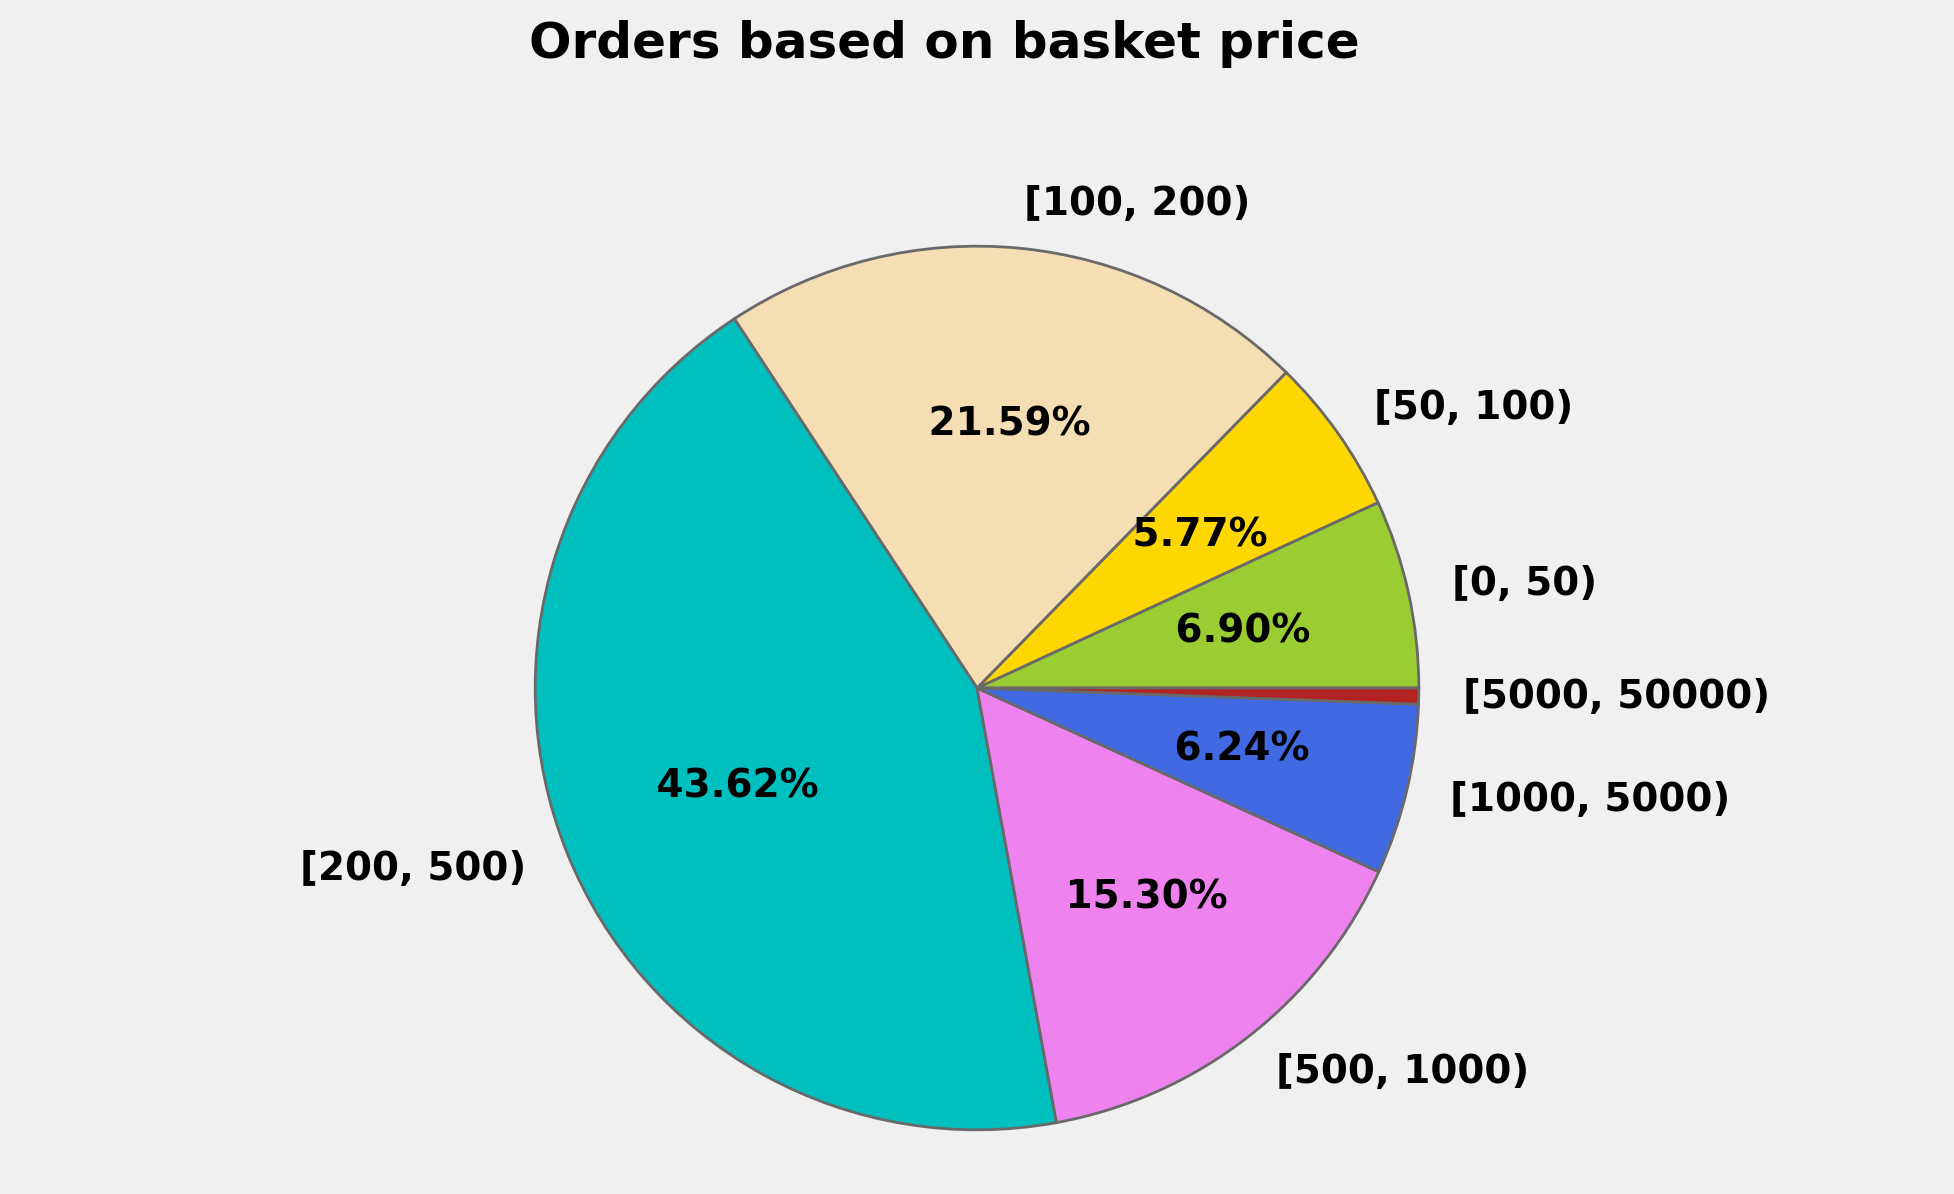

In [30]:
'''
Draw the pie chart.
'''
font = {'family': 'sans-serif', 
        'weight': 'bold'}
plt.rc('font', **font)
f, ax = plt.subplots(figsize=(11, 6), dpi=200)
wedge_colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
wedge_labels = [f"[{prices[i-1]}, {price})" for i, price in enumerate(prices) if not i==0]
autopct_fn = lambda x: f"{x: .2f}%" if x>1 else ""
ax.pie(counts, 
       labels=wedge_labels, 
       colors=wedge_colors, 
       autopct=autopct_fn)
ax.axis('equal')
f.text(x=0.5, y=1.0, s="Orders based on basket price", ha='center', fontsize=18)
plt.show()

It can be seen that the vast majority of orders concern relatively large purchases given that $\sim$65% of purchases give prizes in excess of £ 200.

---
In the dataframe, products are uniquely identified through the **StockCode** variable. A shrort description of the products is given in the **Description** variable. In this section, I intend to use the content of this latter variable in order to group the products into different categories.

**Products Description**

As a first step, I extract from the **Description** variable the information that will prove useful. To do this, I use the following function:

In [31]:
'''
Function to generate keyword inventory.
Keyword Inventory includes 
keyword_keys: a dictionary where keywords are grouped according to their roots.
E.g. 'hearts' and 'heart' will belong to the group with key 'heart'.
count_keywords: a dictionary to count elements of each group.
E.g. If 'hearts' and 'heart' are found then 'heart' group will have count 2.
keyword_selects: a dictionary mapping each group key to one keyword representing the group
E.g. If 'heart' group has 'heart', 'hearts', 'hearty' then 'heart' will represent the group.
category_keys: List of keywords representing the each group
E.g. [..., 'heart', 'bill', ...]
'''
# Noun if first 2 characters of the position tag is NN
is_noun = lambda pos: pos[:2]=="NN"

def keywords_inventory(dataframe, column="Description"):
    stemmer = nltk.SnowballStemmer("english")
    keyword_roots = dict() # Set of keywords for the same keyword root
    count_keywords = dict() # Count keyword roots
    
    category_keys = [] # 
    keyword_selects = dict() # root <-> keywords dictionary
    
    for s in dataframe[column]:
        # Check if description is null
        if pd.isnull(s): continue
        
        lines = s.lower()
        words = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(words) if is_noun(pos)]
        for n in nouns:
            n = n.lower()
            key_root = stemmer.stem(n)
            
            if key_root in keyword_roots:
                keyword_roots[key_root].add(n)
                count_keywords[key_root] += 1
            else:
                keyword_roots[key_root] = {n}
                count_keywords[key_root] = 1
        
    for s in keyword_roots.keys():
        if len(keyword_roots[s])>1:
            # Select the keyword with minimum length
            min_length = 1000
            for k in keyword_roots[s]:
                if len(k) < min_length:
                    min_length = len(k)
                    cat_key = k;
            keyword_selects[s] = cat_key
            category_keys.append(cat_key)
        else:
            keyword_selects[s] = list(keyword_roots[s])[0]
            category_keys.append(list(keyword_roots[s])[0])
        
    print(f"Number of categories in the variable {column}: {len(category_keys)}")
    return keyword_roots, count_keywords, keyword_selects, category_keys

This function takes as input the dataframe and analyzes the content of the **Description** column by performing the following operations:

- extract the names (proper, common) appearing in the products description
- for each name, I extract the root of the word and aggregate the set of names associated with this particular root
- count the number of times each root appears in the dataframe
- when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [32]:
df_products = pd.DataFrame({'Description': df_exp['Description'].unique()}, 
                           columns=['Description'])
display(df_products[:5])
df_products.shape

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


(3877, 1)

In [33]:
keyword_roots, count_keywords, keyword_selects, category_keys = \
keywords_inventory(df_products)

Number of categories in the variable Description: 1477


The execution of this function returns three variables:
- `keywords_roots`: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots
- `count_keywords`: dictionary listing the number of times every word is used
- `keyword_selects`: dictionary mapping the keyword roots to their original keyword
- `category_keys`: the list of extracted keywords

At this point, I convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences:

In [34]:
products_list = []

for k, v in count_keywords.items():
    products_list.append((keyword_selects[k], v))

products_list.sort(key=lambda x: x[1], reverse=True)
products_list[:10]

[('heart', 267),
 ('vintage', 210),
 ('set', 206),
 ('pink', 188),
 ('bag', 164),
 ('box', 153),
 ('glass', 149),
 ('christmas', 137),
 ('design', 128),
 ('candle', 121)]

Using it, I create a representation of the most common keywords:

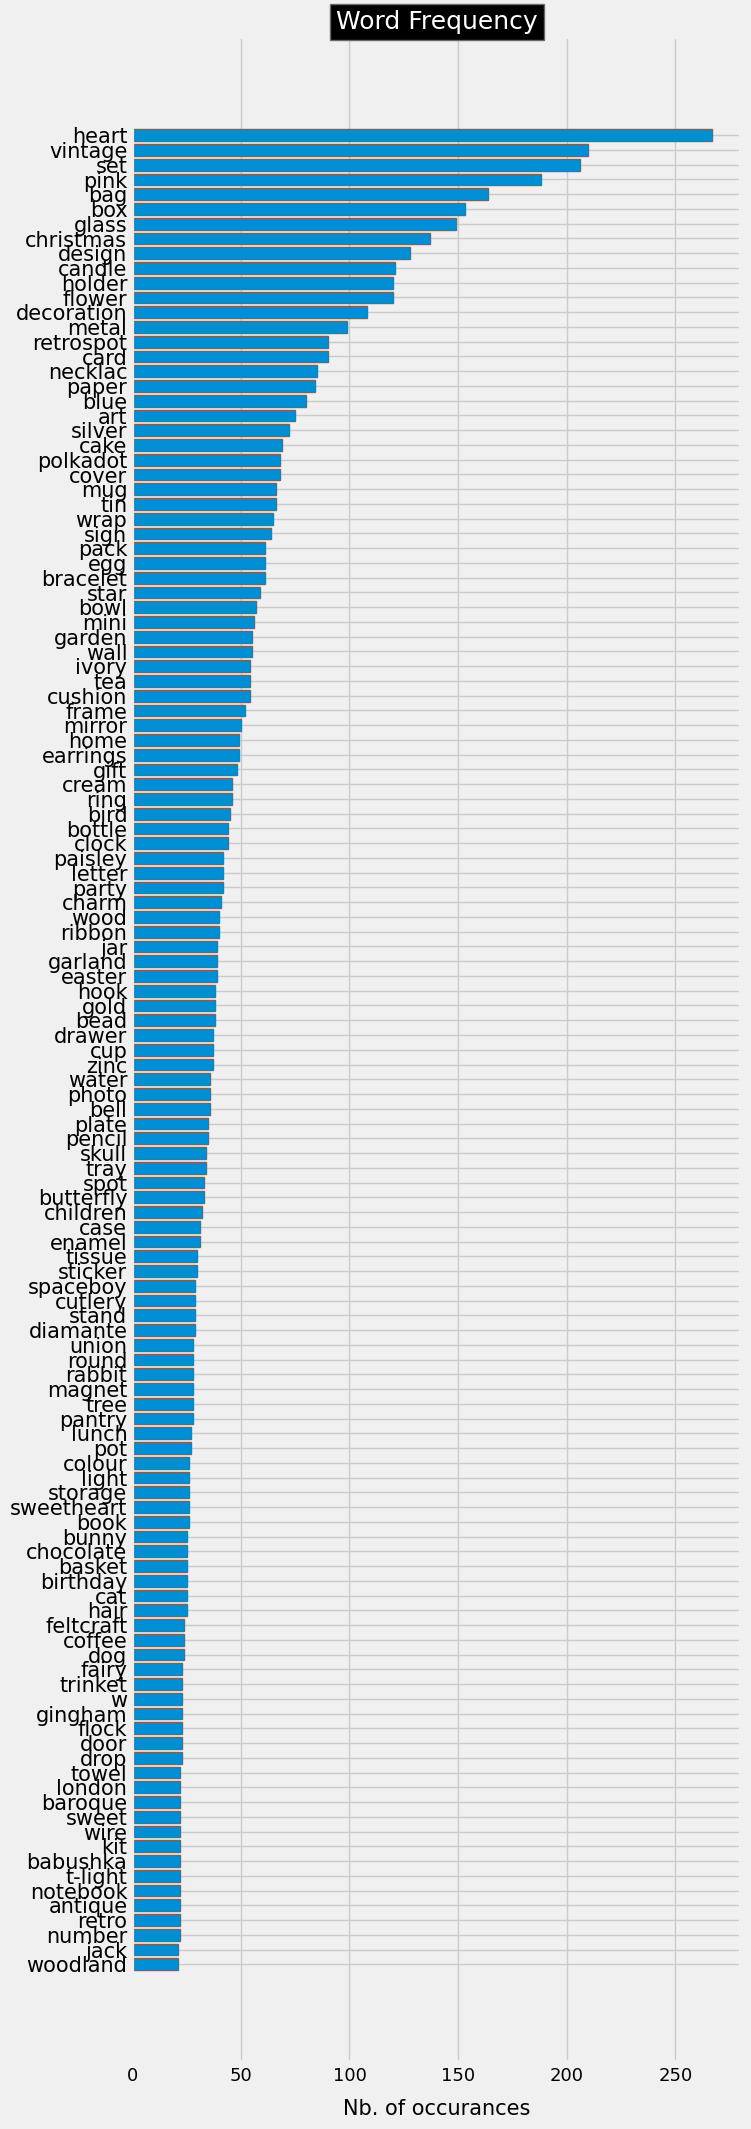

In [35]:
# Choose top N words
top_n = 125

# Configure the figure settings like font weight and figure size
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))

# x=>product keywords id, y=>product keyword count, x_label=>product keywords
y = [i[1] for i in products_list[:top_n]]
x = [k for k, i in enumerate(products_list[:top_n])]
x_label = [i[0] for i in products_list[:top_n]]

# Configure the x and y ticks fontsize
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

# Set y ticks with their labels for each tick value
plt.yticks(x, x_label)
# Set the xlabels, labelpad is the spacing in points from ticks and tick labels.
plt.xlabel("Nb. of occurances", fontsize=15, labelpad=10)

ax.barh(x, y, align='center')

# Get the axis to change the yaxis bar order from ascending to descending
ax = plt.gca()
ax.invert_yaxis()

# Title with a bounding box of black background and 5 padding
plt.title("Word Frequency", bbox={'facecolor': 'k', 'pad': 5}, fontsize=18, color='w')

plt.show()

In [36]:
df = df_exp.copy(deep=True)

---
## Feature Engineering

In this section, I will focus on creating features that will help in customer segmentation. The features include-
- Product categories generated using clustering
- Basket price for each category product
- Time based features like last purchase and first purchase

**Product Categories**

The list that was obtained from keyword inventory contains more than 1400 keywords and the most frequent ones appear in more than 200 products. However, while examinating the content of the list, I note that some names are useless. Others are do not carry information, like colors. Therefore, I discard these words from the analysis that follows and also, I decide to consider only the words that appear more than 13 times.

In [37]:
products_list = []

for k, v in count_keywords.items():
    word = keyword_selects[k]
    
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word)<3 or v<13: continue
    if '+' in word or '/' in word: continue
    products_list.append([word, v])

products_list.sort(reverse=True, key=lambda x: x[1])
products_list[:10]

[['heart', 267],
 ['vintage', 210],
 ['set', 206],
 ['bag', 164],
 ['box', 153],
 ['glass', 149],
 ['christmas', 137],
 ['design', 128],
 ['candle', 121],
 ['holder', 120]]

*Data Encoding*

Now I will use these keywords to create groups of product. Firstly, I define the $X$ matrix as:

   
|   | mot 1  |  ...  | mot j  | ...  | mot N  |
|:-:|---|---|---|---|---|
| produit 1  | $a_{1,1}$  |     |   |   | $a_{1,N}$  |
| ...        |            |     | ...  |   |   |
|produit i   |    ...     |     | $a_{i,j}$    |   | ...  |
|...         |            |     |  ... |   |   |
| produit M  | $a_{M,1}$  |     |   |   | $a_{M,N}$   |

where the $a_ {i, j}$ coefficient  is 1 if the description of the product $i$ contains the word $j$, and 0 otherwise.

In [38]:
X= pd.DataFrame()

for key, occurences in products_list:
    X.loc[:, key] = list(map(lambda x: int(key.upper() in x), df_products['Description']))

X[:5]

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,...,funky,tidy,plant,diner,house,square,craft,lace,wallet,point
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The $X$ matrix indicates the words contained in the description of the products using the *one-hot-encoding* principle. In practice, I have found that introducing the price range results in more balanced groups in terms of element numbers.
Hence, I add 6 extra columns to this matrix, where I indicate the price range of the products:

In [39]:
threshold = [0, 1, 2, 3, 5, 10]
column_names = []
for i in range(1, len(threshold)+1):   
    if i!=len(threshold):
        col_name = f"[{threshold[i-1]}, {threshold[i]})" 
    else:
        col_name = f"[{threshold[i-1]}, INF)"
        
    X.loc[:, col_name] = 0
    column_names.append(col_name)
    
column_names

['[0, 1)', '[1, 2)', '[2, 3)', '[3, 5)', '[5, 10)', '[10, INF)']

In [40]:
for i, product_name in enumerate(df_products['Description']):
    product_mean_price = df[df['Description'] == product_name]['UnitPrice'].mean()
    
    j = 1
    while j<=len(threshold):
        if j == len(threshold):
            if product_mean_price >= threshold[j-1]:
                break
        elif product_mean_price >= threshold[j-1] and product_mean_price < threshold[j]:
            break
        j+=1
    
    X.loc[i, column_names[j-1]] = 1

X[:5]

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,...,craft,lace,wallet,point,"[0, 1)","[1, 2)","[2, 3)","[3, 5)","[5, 10)","[10, INF)"
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


*Creating clusters of products*

I will group the products into different categories. In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the [Hamming's metric](https://en.wikipedia.org/wiki/Distance_de_Hamming). Note that the **kmeans** method of sklearn uses a Euclidean distance that can be used, but it is not to the best choice in the case of categorical variables. However, in order to use the Hamming's metric, we need to use the [kmodes](https://pypi.python.org/pypi/kmodes/) package which is not available on the current plateform. Hence, I use the **kmeans** method even if this is not the best choice.

In order to define (approximately) the number of clusters that best represents the data, I use the silhouette score:

In [41]:
matrix = X.values

for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=30, algorithm='elkan')
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    score = silhouette_score(matrix, clusters)
    
    print(f"Silhouette score for {k} cluster is {score}")

Silhouette score for 3 cluster is 0.10202358629626872
Silhouette score for 4 cluster is 0.12735281759133807
Silhouette score for 5 cluster is 0.14802889650341633
Silhouette score for 6 cluster is 0.14576638387348867
Silhouette score for 7 cluster is 0.13907569680101667
Silhouette score for 8 cluster is 0.15441275838522867
Silhouette score for 9 cluster is 0.12301692202772949


In practice, the scores obtained above can be considered equivalent since, depending on the run, scores of $ 0.1 \pm 0.05 $ will be obtained for all clusters with `n_clusters` $> $ 3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around 0.07:

In [42]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.14:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14774734575720183


In [43]:
pd.Series(clusters).value_counts()

2    1012
3     961
1     762
0     672
4     470
Name: count, dtype: int64

*Silhouette Score*

In order to have an insight on the quality of the classification, we can represent the silhouette scores of each element of the different clusters. This is the purpose of the next figure which is taken from the [sklearn documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html):

In [44]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

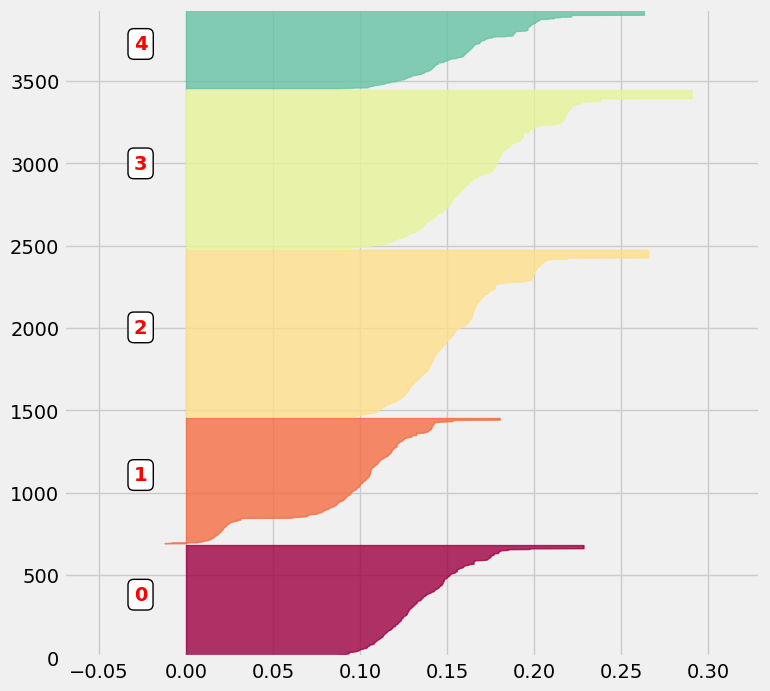

In [45]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

*Word Cloud*

Now we can have a look at the type of objects that each cluster represents. In order to obtain a global view of their contents, I determine which keywords are the most frequent in each of them

In [46]:
product_words = [word for (word, occurence) in products_list]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    product_cluster = df_products.loc[clusters == i]
    for word in product_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(product_cluster.iloc[:, 0].str.contains(word.upper()))

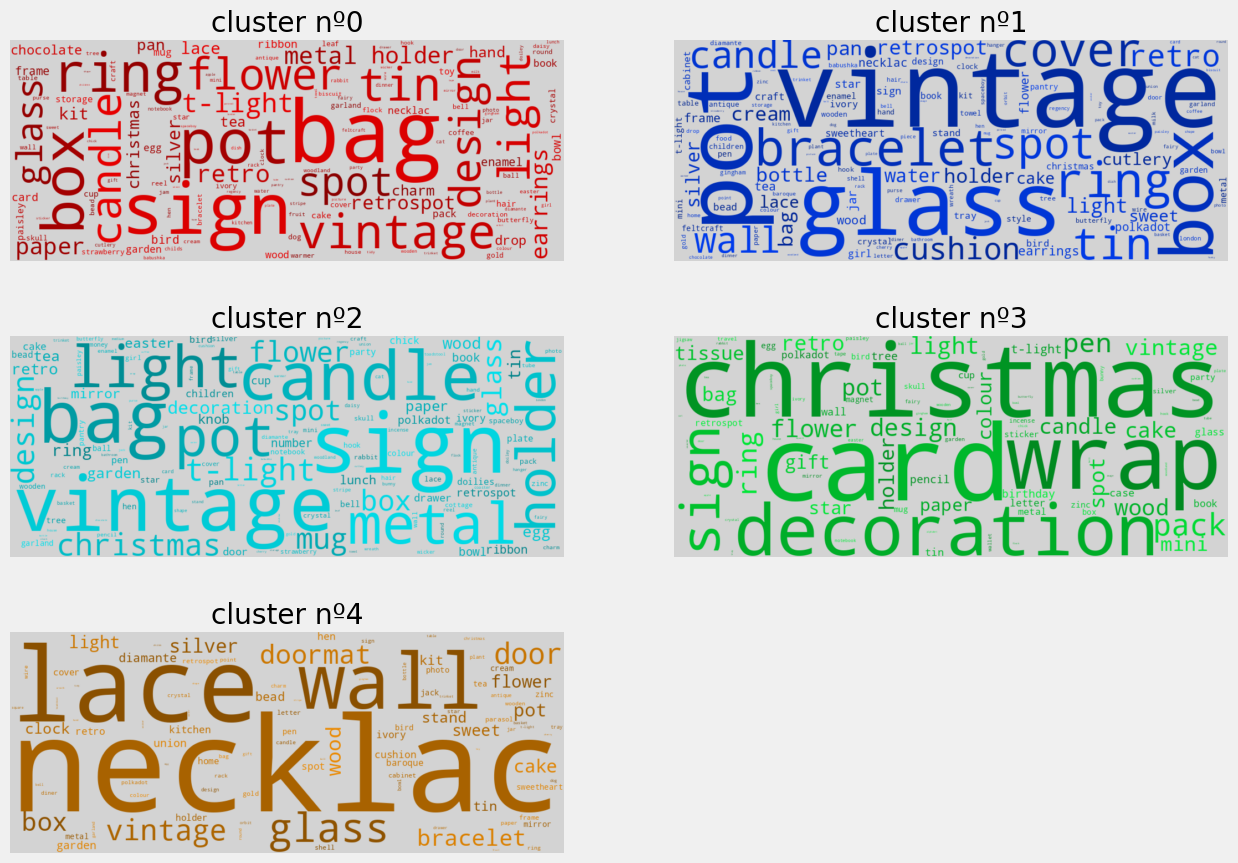

In [47]:
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [48]:
df_feature = df.copy(deep=True)

The different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable **categ_product** where I indicate the cluster of each product :

In [49]:
corresp = dict()
for key, val in zip (df_products['Description'].unique(), clusters):
    corresp[key] = val 
#__________________________________________________________________________
df_feature['categ_product'] = df_feature.loc[:, 'Description'].map(corresp)

I decide to create the **categ_N** variables (with $ N \in [0: 4]$) that contains the amount spent in each product category:

In [50]:
for i in range(n_clusters):
    col = 'categ_{}'.format(i)        
    df_temp = df_feature[df_feature['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_feature.loc[:, col] = price_temp
    df_feature[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_feature[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,0,15.3,0.00,0.0,0.0,0.0
1,536365,WHITE METAL LANTERN,1,0.0,20.34,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,1,0.0,22.00,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,1,0.0,20.34,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,1,0.0,20.34,0.0,0.0,0.0


---
**Grouping Products and Basket Price**

Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 5 categories of products:

In [51]:
#___________________________________________
# Basket price for each purchase
temp = df_feature.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#____________________________________________________________
# Basket price for each purchase per category
for i in range(n_clusters):
    col = 'categ_{}'.format(i) 
    temp = df_feature.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col] 
#_____________________
# Average time of purchase
df_feature['InvoiceDate_int'] = df_feature['InvoiceDate'].astype('int64')
temp = df_feature.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_feature.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# Remove negative or zero basket price
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347.0,537626,711.79,83.40,293.35,187.2,23.40,124.44,2010-12-07 14:57:00.000000000
2,12347.0,542237,475.39,53.10,207.45,130.5,84.34,0.00,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,71.10,153.25,330.9,81.00,0.00,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,78.06,168.76,74.4,41.40,19.90,2011-06-09 13:01:00.000000000
5,12347.0,562032,584.91,119.70,196.41,109.7,61.30,97.80,2011-08-02 08:48:00.000000000


---
**Separation of data over time**

The dataframe `basket_price` contains information for a period of 12 months. Later, one of the objectives will be to develop a model capable of characterizing and anticipating the habits of the customers visiting the site and this, from their first visit. In order to be able to test the model in a realistic way, I split the data set by retaining the first 10 months to develop the model and the following two months to test it:

In [52]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [53]:
train = basket_price[basket_price['InvoiceDate'].dt.date < datetime.date(2011,10,1)]
test         = basket_price[basket_price['InvoiceDate'].dt.date >= datetime.date(2011,10,1)]
basket_price = train.copy(deep = True)

---
**Consumer Order Combinations**

In a second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:

In [54]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count',
                                                                                   'min',
                                                                                   'max',
                                                                                   'mean',
                                                                                   'sum'])
for i in range(n_clusters):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum()/\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,5,382.52,711.79,558.172000,2790.86,14.524555,36.519926,29.836681,10.442659,8.676179
1,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,20.030714,41.953217,38.016069,0.000000
2,12350.0,1,334.40,334.40,334.400000,334.40,27.900718,11.961722,48.444976,11.692584,0.000000
3,12352.0,6,144.35,840.30,345.663333,2073.98,3.370331,68.944734,12.892120,0.491808,14.301006
4,12353.0,1,89.00,89.00,89.000000,89.00,19.887640,44.719101,13.033708,0.000000,22.359551


Finally, I define two additional variables that give the number of days elapsed since the first purchase (** FirstPurchase **) and the number of days since the last purchase (** LastPurchase **):

In [55]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347.0,5,382.52,711.79,558.172000,2790.86,14.524555,36.519926,29.836681,10.442659,8.676179,59,297
1,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,20.030714,41.953217,38.016069,0.000000,5,288
2,12350.0,1,334.40,334.40,334.400000,334.40,27.900718,11.961722,48.444976,11.692584,0.000000,240,240
3,12352.0,6,144.35,840.30,345.663333,2073.98,3.370331,68.944734,12.892120,0.491808,14.301006,2,226
4,12353.0,1,89.00,89.00,89.000000,89.00,19.887640,44.719101,13.033708,0.000000,22.359551,134,134


A customer category of particular interest is that of customers who make only one purchase. One of the objectives may be, for example, to target these customers in order to retain them. In part, I find that this type of customer represents 1/3 of the customers listed:

In [56]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("nb. of clients with one transactions: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

nb. of clients with one transactions: 1445/3608  (40.05%)


The dataframe `transactions_per_user` contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:

In [57]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].values

---
## Customer Segmentation

In the following, I will create clusters of customers. In practice, before creating these clusters, it is interesting to define a base of smaller dimension allowing to describe the `scaled_matrix` matrix. In this case, I will use this base in order to create a representation of the different clusters and thus verify the quality of the separation of the different groups. I therefore perform a PCA beforehand:

In [58]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  3.62305987 259.93189634 556.26687999 377.06036244  21.19556706
  23.91567076  25.23355531  13.98469317  15.67936332]


In the following, I will create clusters of customers. In practice, before creating these clusters, it is interesting to define a base of smaller dimension allowing to describe the `scaled_matrix` matrix. In this case, I will use this base in order to create a representation of the different clusters and thus verify the quality of the separation of the different groups. I therefore perform a PCA beforehand:

In [59]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

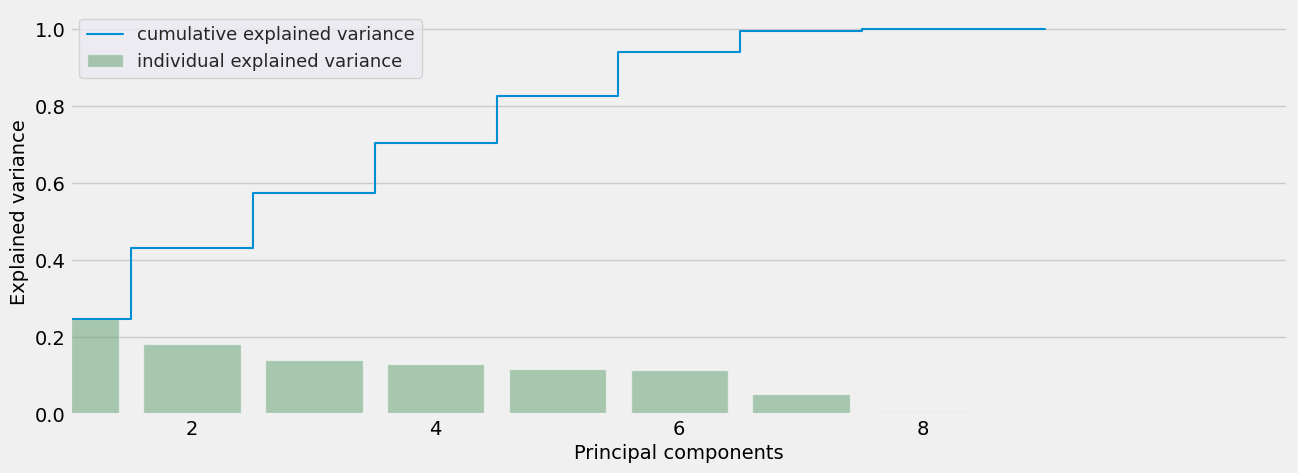

In [60]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1,matrix.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

---
**Clustering Customers**

In [61]:
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=30, algorithm='elkan')
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    score = silhouette_score(scaled_matrix, clusters)
    
    print(f"Silhouette score for {k} cluster is {score}")

Silhouette score for 2 cluster is 0.6453401045755411
Silhouette score for 3 cluster is 0.1630111936729416
Silhouette score for 4 cluster is 0.1732960368088544
Silhouette score for 5 cluster is 0.18081981945777242
Silhouette score for 6 cluster is 0.17820376812187017
Silhouette score for 7 cluster is 0.18631691570267395
Silhouette score for 8 cluster is 0.20270406118187118
Silhouette score for 9 cluster is 0.19814301818439017
Silhouette score for 10 cluster is 0.2068693110412966
Silhouette score for 11 cluster is 0.1820280202655427
Silhouette score for 12 cluster is 0.19879778950905003
Silhouette score for 13 cluster is 0.1889596536613499
Silhouette score for 14 cluster is 0.19332962274077028


At this point, I define clusters of clients from the standardized matrix that was defined earlier and using the `k-means` algorithm from` scikit-learn`. I choose the number of clusters based on the silhouette score and I find that the best score is obtained with 11 clusters:

In [62]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score of silhouette: {:<.3f}'.format(silhouette_avg))

score of silhouette: 0.212


In [63]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of clients']).T

""
nb. of clients


---
**Report via PCA**

There is a certain disparity in the sizes of different groups that have been created. Hence I will now try to understand the content of these clusters in order to validate (or not) this particular separation. At first, I use the result of the PCA:

In [64]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

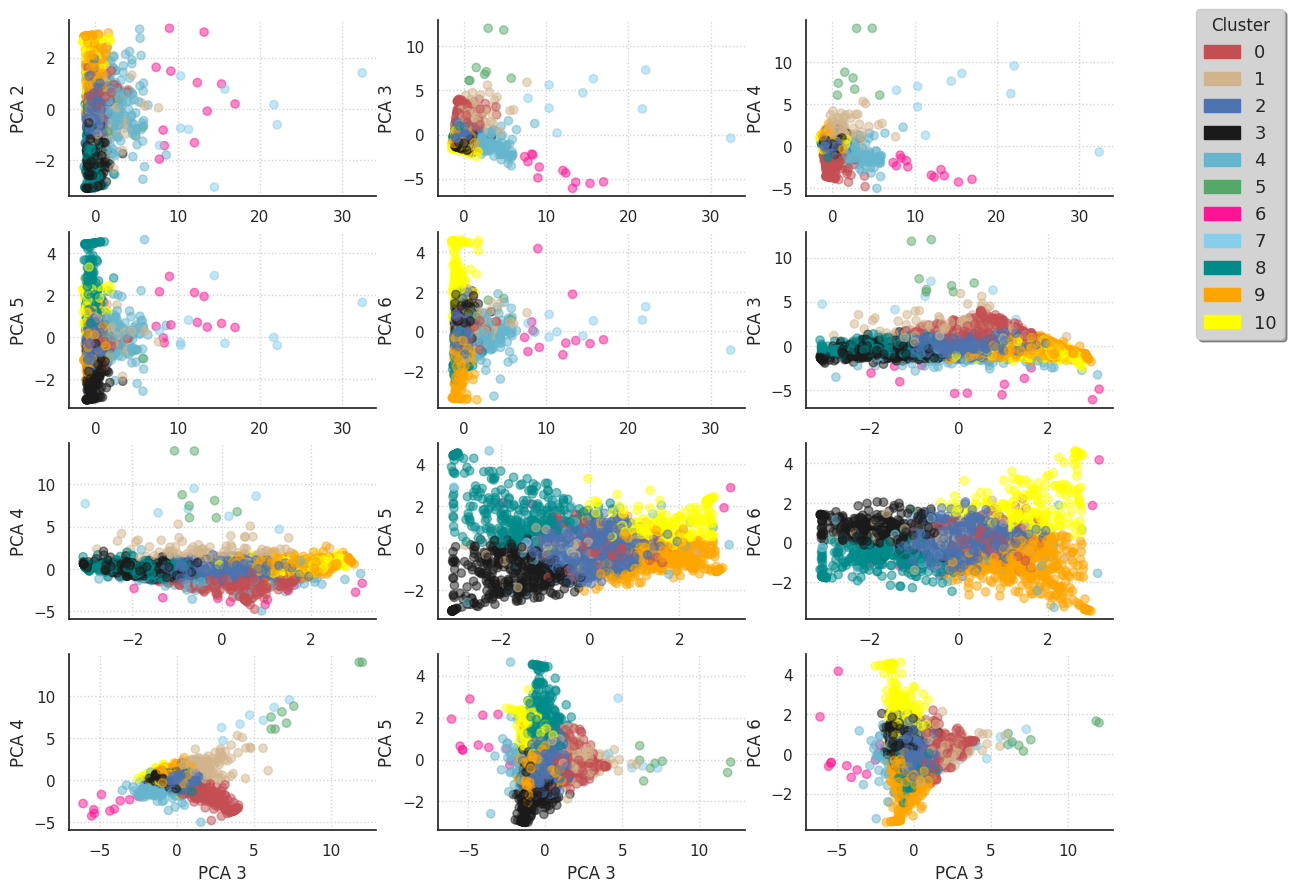

In [65]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

From this representation, it can be seen, for example, that the first principal component allow to separate the tiniest clusters from the rest. More generally, we see that there is always a representation in which two clusters will appear to be distinct.

**Silhouette Score of customer segments**

As with product categories, another way to look at the quality of the separation is to look at silouhette scores within different clusters:

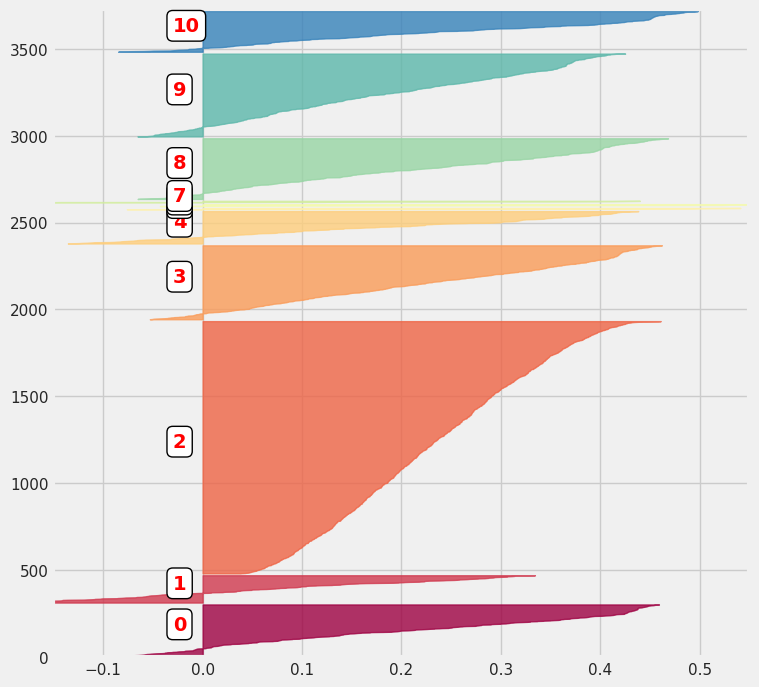

In [66]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

---
**Customers morphotype**

At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the `selected_customers` dataframe a variable that defines the cluster to which each client belongs:

In [67]:
selected_customers.loc[:, 'cluster'] = clusters_clients

Then, I average the contents of this dataframe by first selecting the different groups of clients. This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. I also determine the number of clients in each group (variable **size**):

In [68]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

display(merged_df[:5])

number of customers: 3608


,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,
10.0,2.234043,192.611319,320.940596,248.095380,597.051489,11.143950,8.084564,18.125376,57.203891,5.442219,98.897872,168.872340,235
8.0,2.502857,192.872803,312.765600,246.358670,637.946117,11.562019,19.315748,11.696172,5.291204,52.150979,120.485714,192.205714,350
9.0,2.446541,217.289539,334.144677,272.652847,678.356732,12.850838,11.286281,56.643308,13.162072,6.060621,101.647799,174.511530,477
3.0,2.197183,211.811667,355.095117,274.208140,689.122113,11.549356,59.865525,10.592223,5.167151,12.848721,112.401408,173.009390,426
0.0,2.591837,212.200306,382.740612,293.605734,824.346429,60.856848,9.628434,15.142753,7.006628,7.365337,101.125850,193.292517,294
2.0,3.250000,217.066798,455.820056,327.400657,1075.473623,22.259882,23.862161,25.735571,13.766192,14.384202,81.993802,197.597107,1452
4.0,1.759358,1036.156791,1429.955888,1215.880374,2298.225406,21.273210,26.342051,26.345217,12.099292,13.940591,94.454545,143.743316,187
6.0,1.666667,3480.920833,3966.812500,3700.139306,5949.600000,13.322062,25.406109,20.102624,22.890736,18.278470,68.166667,132.583333,12
1.0,17.822785,87.346772,1507.295633,550.656631,9343.442405,25.340535,22.982202,23.780768,12.237888,15.678440,17.050633,278.658228,158


Finally, I re-organize the content of the dataframe by ordering the different clusters: first, in relation to the amount spent in each product category and then, according to the total amount spent:

In [69]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 40].index.values[0])
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,0.0,2.591837,212.200306,382.740612,293.605734,824.346429,60.856848,9.628434,15.142753,7.006628,7.365337,294
1,3.0,2.197183,211.811667,355.095117,274.208140,689.122113,11.549356,59.865525,10.592223,5.167151,12.848721,426
2,9.0,2.446541,217.289539,334.144677,272.652847,678.356732,12.850838,11.286281,56.643308,13.162072,6.060621,477
3,10.0,2.234043,192.611319,320.940596,248.095380,597.051489,11.143950,8.084564,18.125376,57.203891,5.442219,235
4,8.0,2.502857,192.872803,312.765600,246.358670,637.946117,11.562019,19.315748,11.696172,5.291204,52.150979,350
5,2.0,3.250000,217.066798,455.820056,327.400657,1075.473623,22.259882,23.862161,25.735571,13.766192,14.384202,1452
6,4.0,1.759358,1036.156791,1429.955888,1215.880374,2298.225406,21.273210,26.342051,26.345217,12.099292,13.940591,187
7,6.0,1.666667,3480.920833,3966.812500,3700.139306,5949.600000,13.322062,25.406109,20.102624,22.890736,18.278470,12
8,1.0,17.822785,87.346772,1507.295633,550.656631,9343.442405,25.340535,22.982202,23.780768,12.237888,15.678440,158
9,5.0,87.125000,20.862500,2643.812500,456.526689,37313.235000,24.602475,22.342690,25.167568,11.475352,16.434535,8


---
**Customers morphology**

Finally, I created a representation of the different morphotypes. To do this, I define a class to create "Radar Charts" (which has been adapted from this [kernel](https://www.kaggle.com/yassineghouzam/don-t-know-why-employees-leave -read-this)):

In [70]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

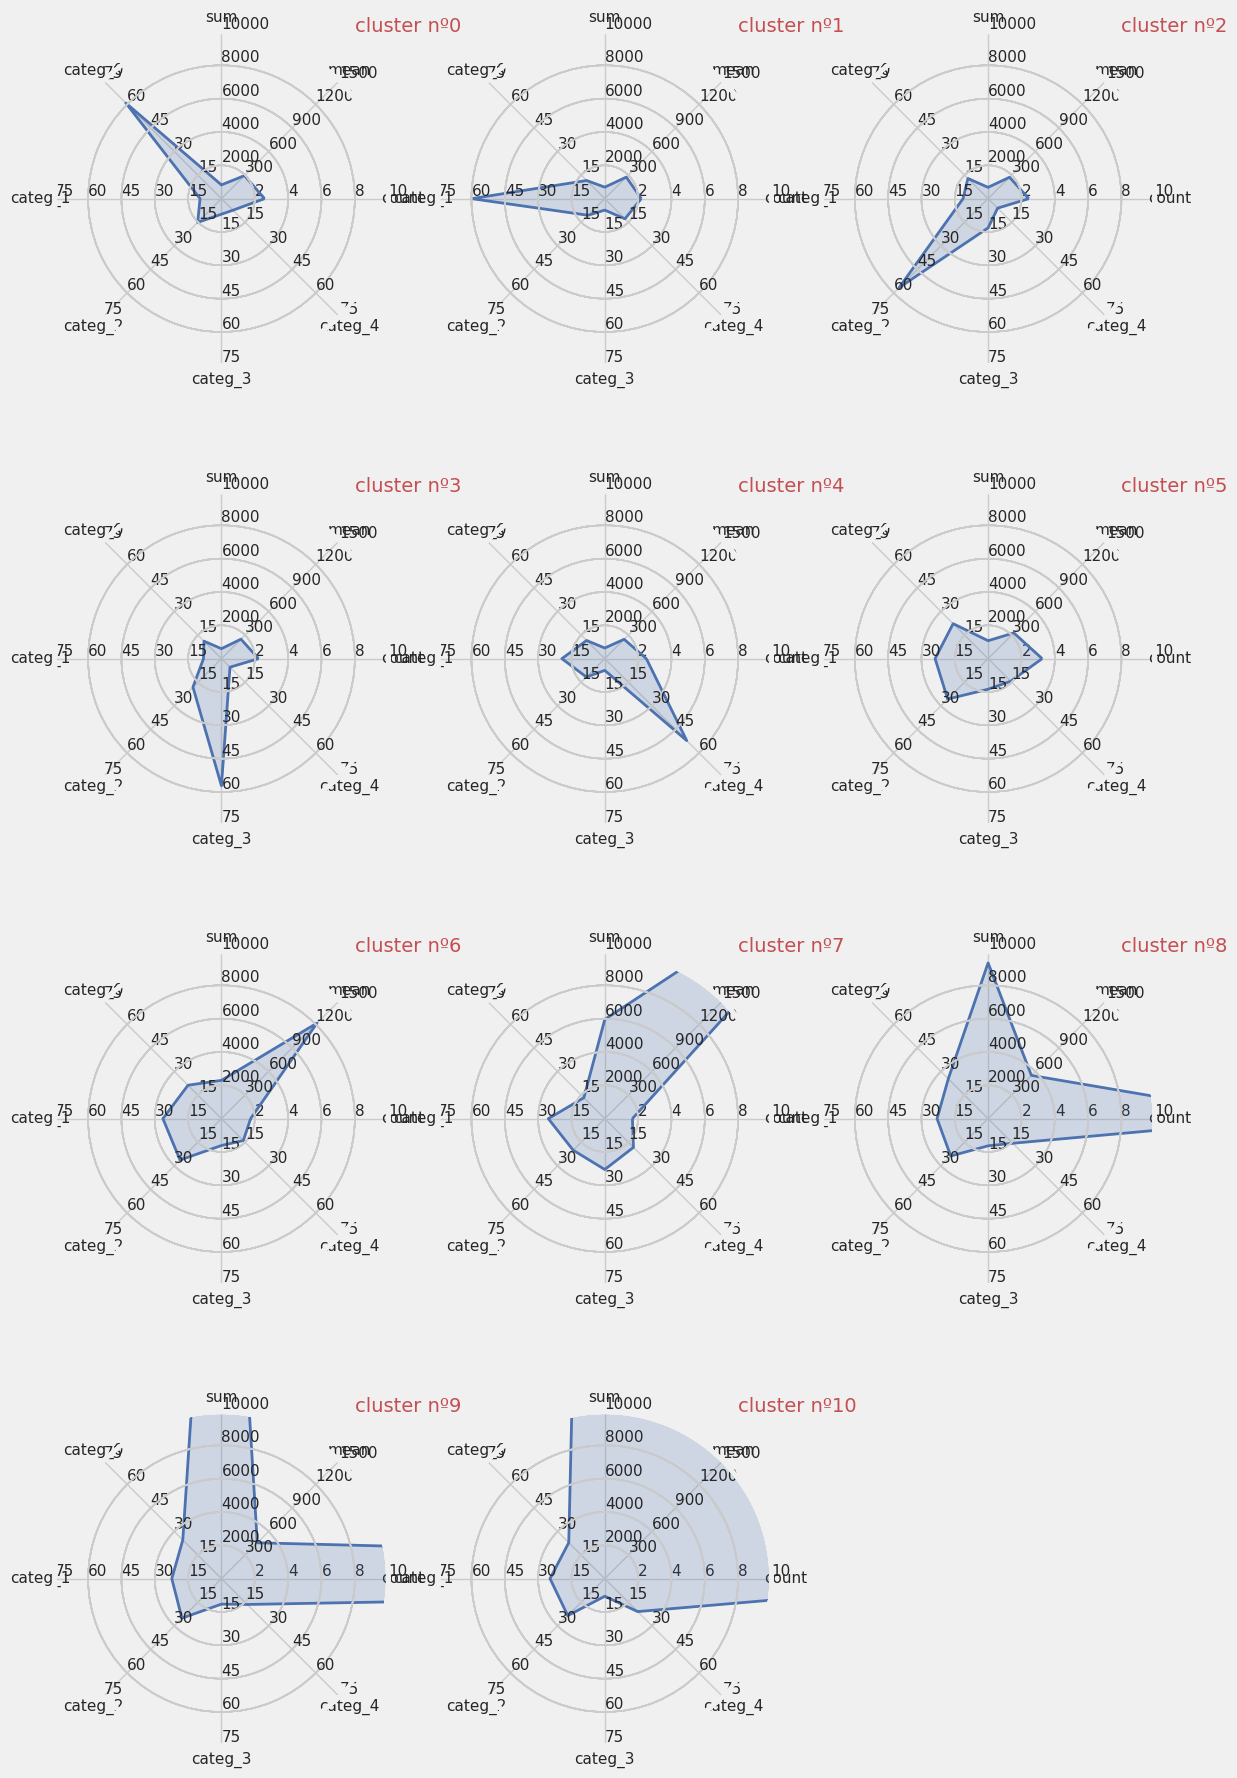

In [71]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1

It can be seen, for example, that the first 5 clusters correspond to a strong preponderance of purchases in a particular category of products. Other clusters will differ from basket averages (** mean **), the total sum spent by the clients (** sum **) or the total number of visits made (** count **).